# ポートフォリオ

In [ ]:
import pandas as pd
df = pd.read_csv("1751−700.csv",index_col=0)
print(df)

              7203     6758    8306     6861     8035     6501   9432    8316  \
Date                                                                            
2017-02-01  1309.2   3410.0   727.4  21930.0   3850.0   3241.0   99.2  4413.0   
2017-02-02  1286.0   3369.0   721.7  21820.0   3813.3   3278.5   97.2  4350.0   
2017-02-03  1289.0   3537.0   730.0  22070.0   3746.7   3303.5   97.5  4413.0   
2017-02-06  1298.6   3589.0   754.7  22005.0   3715.0   3323.5   97.0  4485.0   
2017-02-07  1269.2   3599.0   751.2  21940.0   3763.3   3361.5   97.5  4479.0   
...            ...      ...     ...      ...      ...      ...    ...     ...   
2024-03-26  3850.0  13110.0  1565.5  71300.0  38930.0  13800.0  184.2  8927.0   
2024-03-27  3853.0  13205.0  1571.0  70500.0  39510.0  14020.0  184.0  9061.0   
2024-03-28  3806.0  12930.0  1535.0  70090.0  39260.0  13755.0  180.0  8832.0   
2024-03-29  3792.0  12985.0  1557.0  69540.0  39570.0  13905.0  179.8  8909.0   
2024-04-01  3639.0  13065.0 

In [ ]:
import pandas as pd

# 列名を整数に変更する
df.columns = df.columns.astype(int)

# 列の値が小さい順に並び替える
df= df.reindex(sorted(df.columns), axis=1)

# 欠損値の個数を数える
missing_values_count = df.isnull().sum()

# 欠損値が10個以上の列を取得
columns_to_drop = missing_values_count[missing_values_count >= 5].index

# 欠損値が10個以上の列を削除
df = df.drop(columns=columns_to_drop)
print(df)

             1332    1333    1377    1414    1417    1605    1662    1719  \
Date                                                                        
2017-02-01  548.0  3125.0  3275.0  2432.5  1050.0  1113.0  2551.0   799.0   
2017-02-02  541.0  3110.0  3215.0  2375.0  1042.0  1083.5  2460.0   793.0   
2017-02-03  546.0  3135.0  3260.0  2392.5  1104.0  1085.0  2470.0   792.0   
2017-02-06  593.0  3195.0  3230.0  2402.5  1092.0  1089.0  2470.0   797.0   
2017-02-07  589.0  3380.0  3140.0  2405.0  1087.0  1074.5  2448.0   797.0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2024-03-26  983.1  3031.0  3715.0  6462.0  1891.5  2270.0  6830.0  1250.0   
2024-03-27  996.2  3042.0  3735.0  6478.0  1897.0  2269.5  6860.0  1247.0   
2024-03-28  947.5  2956.5  3705.0  6349.0  1861.5  2299.5  6840.0  1176.0   
2024-03-29  960.1  2973.5  3730.0  6424.0  1910.0  2340.5  6860.0  1186.0   
2024-04-01  941.6  2989.5  3730.0  6444.0  1908.5  2279.0  6660.0  1182.0   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# データフレーム df が既に与えられているとします

# 株価終値の対数収益率を計算する関数
def calculate_log_returns(df):

    # 日次の対数収益率を計算します
    log_returns = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
    return log_returns

# 対数収益率の計算
log_returns = calculate_log_returns(df)

# 最初のNaNを含む行を削除します
log_returns = log_returns.dropna()

print(log_returns)

                1332      1333      1377      1414      1417      1605  \
Date                                                                     
2017-02-02 -0.012856 -0.004812 -0.018491 -0.023922 -0.007648 -0.026863   
2017-02-03  0.009200  0.008006  0.013900  0.007341  0.057798  0.001383   
2017-02-06  0.082575  0.018958 -0.009245  0.004171 -0.010929  0.003680   
2017-02-07 -0.006768  0.056289 -0.028259  0.001040 -0.004589 -0.013404   
2017-02-08 -0.017124 -0.013403  0.011085  0.003114 -0.020447 -0.011231   
...              ...       ...       ...       ...       ...       ...   
2024-03-26 -0.002235 -0.006577  0.004046  0.004809 -0.007112 -0.002200   
2024-03-27  0.013237  0.003623  0.005369  0.002473  0.002904 -0.000220   
2024-03-28 -0.050121 -0.028509 -0.008065 -0.020115 -0.018891  0.013132   
2024-03-29  0.013211  0.005734  0.006725  0.011744  0.025721  0.017673   
2024-04-01 -0.019457  0.005366  0.000000  0.003108 -0.000786 -0.026628   

                1662      1719      1

In [ ]:
# 標準化された対数収益率の相関行列の計算
correlation_matrix = log_returns.corr()

# 結果の表示
print(correlation_matrix)

          1332      1333      1377      1414      1417      1605      1662  \
1332  1.000000  0.539161  0.300346  0.299260  0.350326  0.280622  0.228944   
1333  0.539161  1.000000  0.325294  0.274627  0.352378  0.250091  0.259342   
1377  0.300346  0.325294  1.000000  0.363658  0.320223  0.221544  0.254268   
1414  0.299260  0.274627  0.363658  1.000000  0.423640  0.240984  0.290707   
1417  0.350326  0.352378  0.320223  0.423640  1.000000  0.248366  0.251972   
...        ...       ...       ...       ...       ...       ...       ...   
9962  0.234062  0.220557  0.274875  0.333674  0.342258  0.274293  0.270821   
9983  0.225261  0.186823  0.175966  0.216763  0.229384  0.257175  0.191069   
9984  0.195041  0.194901  0.196748  0.243853  0.197350  0.268695  0.226137   
9987  0.355123  0.347183  0.332122  0.338175  0.338434  0.223495  0.244819   
9989  0.237118  0.242044  0.278734  0.296974  0.290815  0.113066  0.155051   

          1719      1721      1801  ...      9869      9934    

In [ ]:
import pandas as pd

# Calculate the annual return for each stock
annual_return = log_returns.sum() * (250 / log_returns.shape[0])

# Calculate the annual volatility for each stock
annual_volatility = log_returns.std() * (250 ** 0.5)

# Combine the results into a DataFrame
results = pd.DataFrame({
    'Annual Return': annual_return,
    'Annual Volatility': annual_volatility
})

print(results)


      Annual Return  Annual Volatility
1332       0.079351           0.278028
1333      -0.002433           0.243638
1377       0.017472           0.260437
1414       0.142101           0.227899
1417       0.088424           0.241184
...             ...                ...
9962       0.000211           0.333085
9983       0.193949           0.305237
9984       0.098351           0.402962
9987       0.031343           0.255431
9989       0.025488           0.258103

[672 rows x 2 columns]


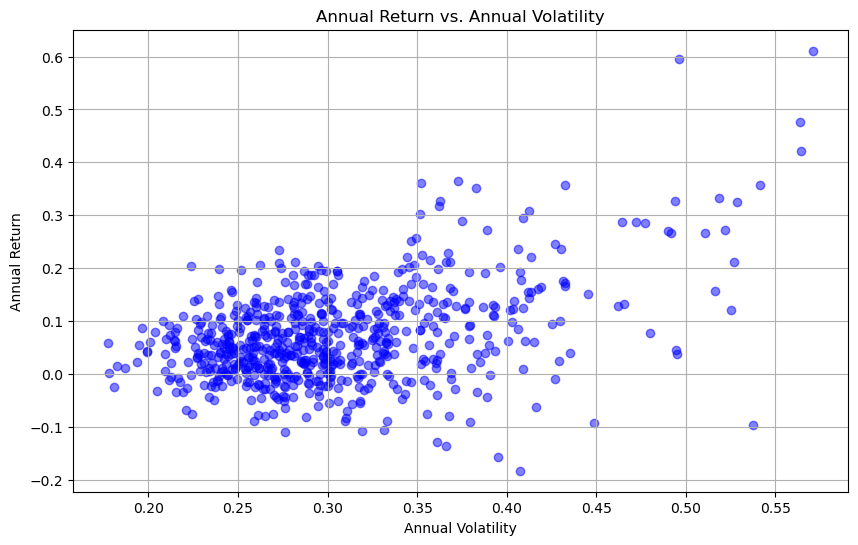

In [ ]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(annual_volatility, annual_return, color='blue', alpha=0.5)
plt.title('Annual Return vs. Annual Volatility')
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.grid(True)
plt.show()


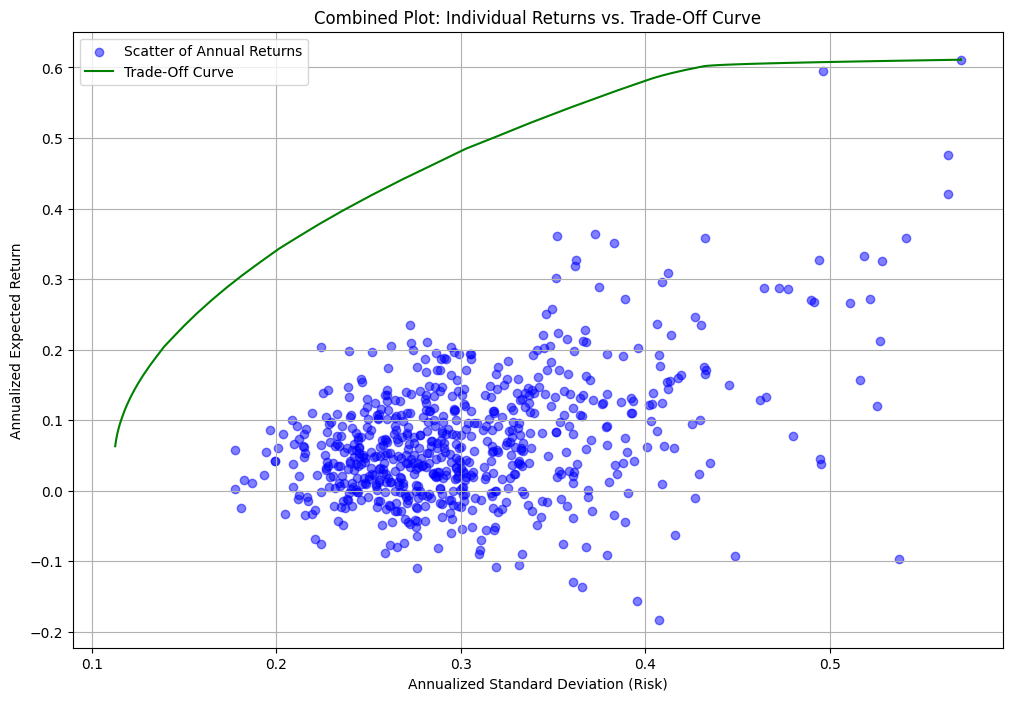

In [ ]:
# 図のプロット
plt.figure(figsize=(12, 8))
plt.scatter(annual_volatility, annual_return, color='blue', alpha=0.5, label='Scatter of Annual Returns')
plt.plot(risk_data, ret_data, 'g-', label='Trade-Off Curve')
plt.xlabel('Annualized Standard Deviation (Risk)')
plt.ylabel('Annualized Expected Return')
plt.title('Combined Plot: Individual Returns vs. Trade-Off Curve')
plt.legend()
plt.grid(True)
plt.show()